# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

**⚠️ IMPORTANT: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. ⚠️**

## Overview

This notebook explores Dandiset 001361, which contains 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. The data is part of the study "A flexible hippocampal population code for experience relative to reward" by Sosa, Plitt, & Giocomo.

Link to Dandiset: [https://dandiarchive.org/dandiset/001361/0.250406.0045](https://dandiarchive.org/dandiset/001361/0.250406.0045)

In this notebook, we will:
1. Connect to the DANDI archive and retrieve basic information about the Dandiset
2. Explore the structure of an NWB file from the dataset
3. Visualize behavioral data (position, speed, reward events)
4. Analyze neural activity data (fluorescence signals from CA1 neurons)
5. Examine the relationship between neural activity and behavioral variables

## Required Packages

The following packages are required to run this notebook:

- `numpy` - For numerical operations
- `matplotlib` - For plotting
- `h5py` - For handling HDF5 files
- `pynwb` - For reading NWB files
- `remfile` - For remote file access
- `dandi` - For accessing the DANDI archive
- `pandas` - For data manipulation
- `seaborn` - For enhanced visualization

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pynwb
import remfile
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pandas as pd
import seaborn as sns

# Set up plotting
sns.set_theme()
plt.rcParams['figure.figsize'] = (14, 8)

## Connecting to the DANDI Archive

We'll start by connecting to the DANDI archive and retrieving basic information about Dandiset 001361.

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001361", "0.250406.0045")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Dandiset description: {metadata.get('description', 'No description available')[:500]}...")
print(f"Contributors: {', '.join(metadata.get('contributor', ['Not specified']))}")
print(f"Keywords: {', '.join(metadata.get('keywords', ['None']))}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045
Dandiset description: 2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. Included in Sosa, Plitt, & Giocomo, "A flexible hippocampal population code for experience relative to reward," Nature Neuroscience.

To reinforce rewarding behaviors, events leading up to and following rewards must be remembered. Hippocampal place cell activity spans spatial and non-spatial episodes, but whether hippocampal activity encodes entire sequences of events relative to reward is u...


TypeError: sequence item 0: expected str instance, dict found

## Loading an NWB File

Now we'll load one of the NWB files from the dataset. We'll use the file from subject m11, session 03, which contains both behavioral and two-photon imaging data.

In [3]:
# Define the URL for our selected NWB file
# We're using the first file: "sub-m11/sub-m11_ses-03_behavior+ophys.nwb"
asset_id = "d77ea78a-8978-461d-9d11-3c5cef860d82"
file_url = f"https://api.dandiarchive.org/api/assets/{asset_id}/download/"
print(f"Loading file from URL: {file_url}")

# Open the remote file
remote_file = remfile.File(file_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic information about the NWB file
print(f"\nNWB File Information:")
print(f"Session ID: {nwb.session_id}")
print(f"Session Description: {nwb.session_description}")
print(f"Experiment Identifier: {nwb.identifier}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Experimenter: {', '.join(nwb.experimenter)}")

# Subject information
print(f"\nSubject Information:")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Species: {nwb.subject.species}")
print(f"Sex: {nwb.subject.sex}")
print(f"Date of Birth: {nwb.subject.date_of_birth}")

# Print link to neurosift for this file
neurosift_url = f"https://neurosift.app/nwb?url={file_url}&dandisetId=001361&dandisetVersion=0.250406.0045"
print(f"\nExplore this file in Neurosift: {neurosift_url}")

Loading file from URL: https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."



NWB File Information:
Session ID: 03
Session Description: processed suite2p data
Experiment Identifier: /data/InVivoDA/GCAMP11/23_02_2023/Env1_LocationB_to_A
Session Start Time: 2023-02-23 00:00:00-08:00
Experimenter: Mari Sosa

Subject Information:
Subject ID: m11
Species: Mus musculus
Sex: M
Date of Birth: 2022-09-20 00:00:00-07:00

Explore this file in Neurosift: https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=0.250406.0045


## NWB File Structure

The NWB file contains a rich set of data describing both the behavioral and neural measurements from the experiment. Let's explore the structure of the file.

### Key components of this NWB file:

- **Acquisition**: Contains raw data, including TwoPhotonSeries
- **Processing**: Contains processed data, including:
  - **behavior**: Behavioral measurements like position, speed, lick events, reward information
  - **ophys**: Optical physiology data, including:
    - Fluorescence: Calcium imaging signals from identified neurons (ROIs)
    - Deconvolved: Deconvolved neural activity (spike inference)
    - ImageSegmentation: Information about the identified regions of interest (ROIs)
    - Images: Background images from the calcium imaging
- **Devices**: Information about the microscope used
- **Imaging Planes**: Details about the imaging configuration

Let's explore each of these components.

In [4]:
# Print the structure of the NWB file in a more organized format
print("NWB File Structure:")

# Check acquisition
print("\n1. ACQUISITION:")
for name, item in nwb.acquisition.items():
    print(f"  - {name} ({type(item).__name__})")
    
    # For TwoPhoton data, print more details
    if name == "TwoPhotonSeries":
        print(f"    • Imaging Rate: {item.rate} Hz")
        print(f"    • Imaging Plane Location: {item.imaging_plane.location}")
        print(f"    • Indicator: {item.imaging_plane.indicator}")
        print(f"    • Excitation Lambda: {item.imaging_plane.excitation_lambda} nm")

# Check processing modules
print("\n2. PROCESSING MODULES:")
for module_name, module in nwb.processing.items():
    print(f"  - {module_name} Module: {module.description}")
    
    # List data interfaces in the module
    print(f"    Data interfaces:")
    for interface_name, interface in module.data_interfaces.items():
        print(f"    • {interface_name} ({type(interface).__name__})")
        
        # For behavioral data, list the time series
        if module_name == "behavior" and interface_name == "BehavioralTimeSeries":
            print(f"      Time series:")
            for ts_name in interface.time_series:
                ts = interface.time_series[ts_name]
                shape_str = f"shape {ts.data.shape}" if hasattr(ts.data, 'shape') else ""
                print(f"      - {ts_name}: {ts.description} ({shape_str})")
        
        # For ophys data, look at fluorescence and segmentation
        if module_name == "ophys":
            if interface_name == "Fluorescence" or interface_name == "Deconvolved" or interface_name == "Neuropil":
                for series_name, series in interface.roi_response_series.items():
                    print(f"      - {series_name}: {series.data.shape}")
            
            if interface_name == "ImageSegmentation":
                for seg_name, seg in interface.plane_segmentations.items():
                    num_rois = len(seg.id.data)
                    print(f"      - {seg_name}: {num_rois} ROIs")

NWB File Structure:

1. ACQUISITION:
  - TwoPhotonSeries (TwoPhotonSeries)
    • Imaging Rate: 15.5078125 Hz
    • Imaging Plane Location: hippocampus, CA1
    • Indicator: GCaMP7f
    • Excitation Lambda: 920.0 nm

2. PROCESSING MODULES:
  - behavior Module: behavior data
    Data interfaces:
    • BehavioralTimeSeries (BehavioralTimeSeries)
      Time series:
      - Reward: reward delivery (shape (69,))
      - autoreward: whether trial was automatically rewarded if the subject failed to lick (shape (20684,))
      - environment: Virtual reality environment (shape (20684,))
      - lick: lick detection by capacitive sensor, cumulative per imaging frame (shape (20684,))
      - position: Position in a virtual linear track (shape (20684,))
      - reward_zone: reward zone entry (binary) (shape (20684,))
      - scanning: whether scanning occurred to collect ophys data (shape (20684,))
      - speed: the speed of the subject measured over time (shape (20684,))
      - teleport: end of 

## Exploring Behavioral Data

Now let's explore and visualize the behavioral data from this experiment. The behavior processing module includes several time series like position, speed, reward events, and more.

We'll visualize:
1. Animal position in the virtual track over time
2. Speed profile
3. Reward events

Loaded 5000 data points spanning 322.35 seconds
Found 13 reward events during this period


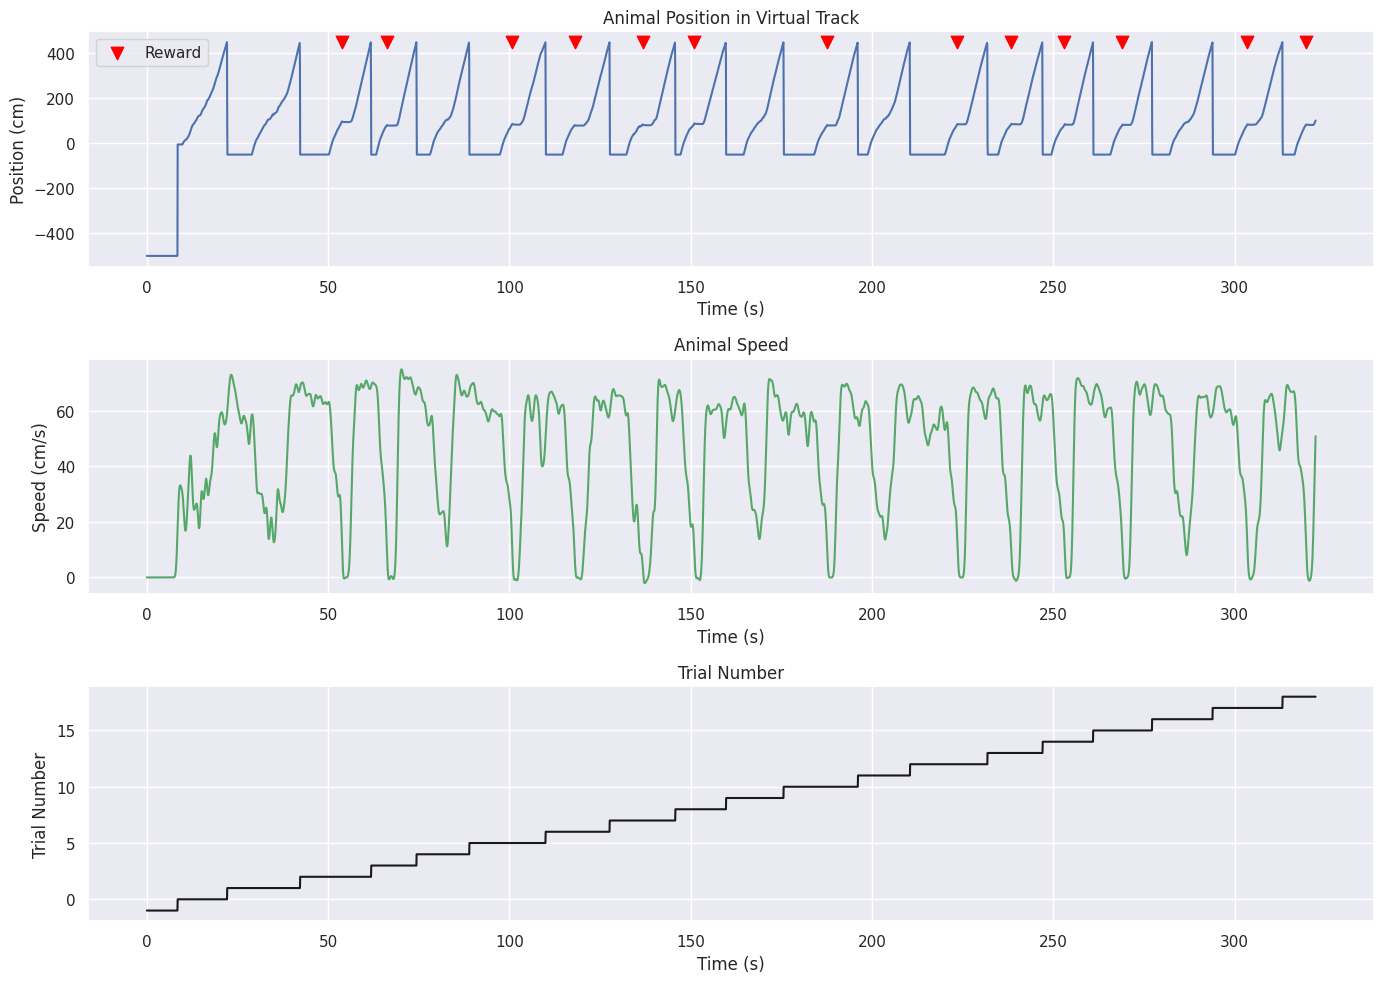

In [5]:
# Access behavioral data
behavior = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"]

# Get position, speed and reward data
position = behavior.time_series["position"]
speed = behavior.time_series["speed"]
reward = behavior.time_series["Reward"]
reward_zone = behavior.time_series["reward_zone"]
trial_number = behavior.time_series["trial number"]

# Get a sample of the data (first 5000 points to avoid loading too much data)
sample_size = 5000
position_data = position.data[:sample_size]
position_timestamps = position.timestamps[:sample_size]
speed_data = speed.data[:sample_size]
trial_data = trial_number.data[:sample_size]

# Find reward events that occurred during our sample period
reward_indices = np.where(reward.timestamps[:] <= position_timestamps[-1])[0]
reward_times = reward.timestamps[reward_indices]
reward_amounts = reward.data[reward_indices]

print(f"Loaded {sample_size} data points spanning {position_timestamps[-1] - position_timestamps[0]:.2f} seconds")
print(f"Found {len(reward_indices)} reward events during this period")

# Visualize position over time
plt.figure(figsize=(14, 10))

# Plot 1: Position over time
plt.subplot(3, 1, 1)
plt.plot(position_timestamps, position_data, 'b-')
plt.scatter(reward_times, np.ones_like(reward_times) * np.max(position_data), 
            color='red', s=80, marker='v', label='Reward')
plt.xlabel('Time (s)')
plt.ylabel('Position (cm)')
plt.title('Animal Position in Virtual Track')
plt.legend()

# Plot 2: Speed over time
plt.subplot(3, 1, 2)
plt.plot(position_timestamps, speed_data, 'g-')
plt.xlabel('Time (s)')
plt.ylabel('Speed (cm/s)')
plt.title('Animal Speed')

# Plot 3: Trial number
plt.subplot(3, 1, 3)
plt.plot(position_timestamps, trial_data, 'k-')
plt.xlabel('Time (s)')
plt.ylabel('Trial Number')
plt.title('Trial Number')

plt.tight_layout()
plt.show()

## Analyzing Position and Reward Relationship

Let's take a closer look at the relationship between position in the track and reward events.
This analysis will help us understand the spatial distribution of rewards in the virtual environment.

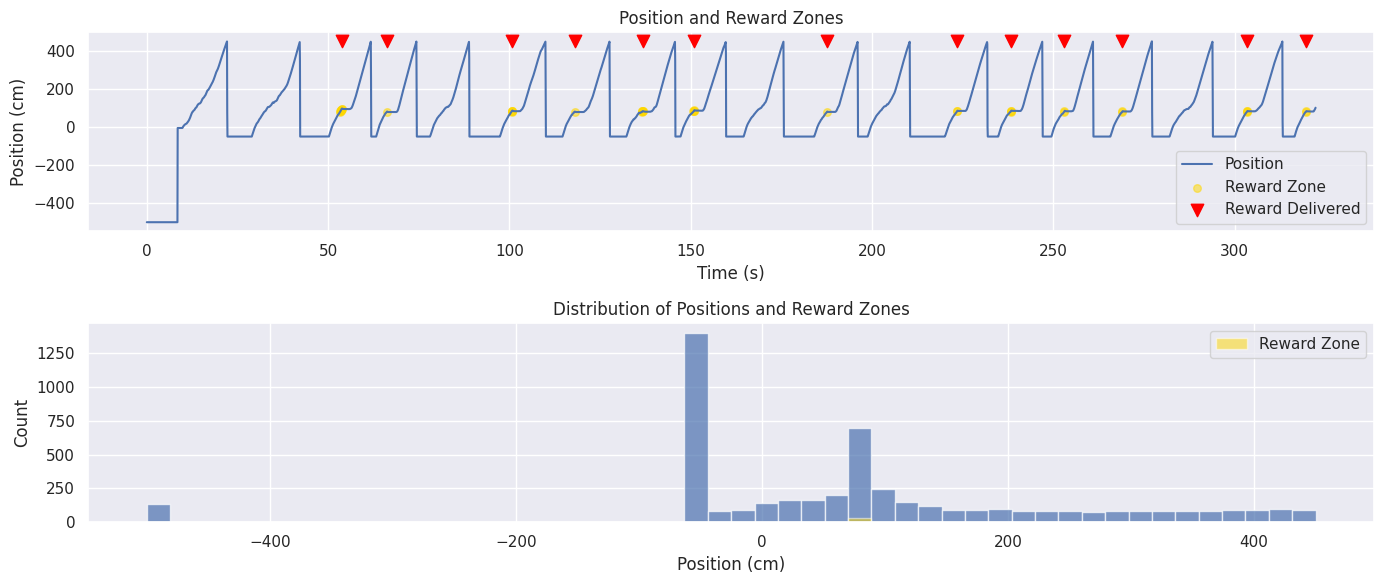

In [6]:
# Create a figure for position analysis
plt.figure(figsize=(14, 6))

# Let's get additional data about reward zones
reward_zone_data = reward_zone.data[:sample_size]
reward_zone_timestamps = reward_zone.timestamps[:sample_size]

# Plot position with reward zones highlighted
plt.subplot(2, 1, 1)
plt.plot(position_timestamps, position_data, 'b-', label='Position')

# Highlight reward zones
reward_zone_indices = np.where(reward_zone_data > 0)[0]
reward_zone_times = reward_zone_timestamps[reward_zone_indices]
reward_zone_positions = position_data[reward_zone_indices]
plt.scatter(reward_zone_times, reward_zone_positions, color='gold', s=30, alpha=0.5, label='Reward Zone')

# Mark actual reward deliveries
plt.scatter(reward_times, np.ones_like(reward_times) * np.max(position_data), 
            color='red', s=80, marker='v', label='Reward Delivered')

plt.xlabel('Time (s)')
plt.ylabel('Position (cm)')
plt.title('Position and Reward Zones')
plt.legend()

# Plot position histogram to see preferred locations
plt.subplot(2, 1, 2)
# Create histogram of positions
hist, bins = np.histogram(position_data, bins=50)
bin_centers = (bins[:-1] + bins[1:]) / 2

plt.bar(bin_centers, hist, width=(bins[1]-bins[0]), alpha=0.7)

# Overlay reward zone positions distribution
hist_rz, _ = np.histogram(reward_zone_positions, bins=bins)
plt.bar(bin_centers, hist_rz, width=(bins[1]-bins[0]), alpha=0.5, color='gold', label='Reward Zone')

plt.xlabel('Position (cm)')
plt.ylabel('Count')
plt.title('Distribution of Positions and Reward Zones')
plt.legend()

plt.tight_layout()
plt.show()

## Exploring Neural Activity Data

Now let's explore the neural activity recorded with 2-photon calcium imaging.
The data includes:
- Raw fluorescence traces
- Deconvolved activity (inferred spike events)
- ROI (Region of Interest) information

Let's first look at some of the fluorescence traces and their relationship to behavior.

In [7]:
# Access fluorescence data
fluorescence = nwb.processing["ophys"].data_interfaces["Fluorescence"]
deconvolved = nwb.processing["ophys"].data_interfaces["Deconvolved"]

# Get the ROI response series for plane0
fluor_series = fluorescence.roi_response_series["plane0"]
deconv_series = deconvolved.roi_response_series["plane0"]

# Get information about the ROIs
image_seg = nwb.processing["ophys"].data_interfaces["ImageSegmentation"]
plane_seg = image_seg.plane_segmentations["PlaneSegmentation"]

# Get the number of ROIs and the sampling rate
num_rois = fluor_series.data.shape[1]
sampling_rate = fluor_series.rate

print(f"Number of ROIs (neurons): {num_rois}")
print(f"Sampling rate: {sampling_rate} Hz")
print(f"Recording duration: {fluor_series.data.shape[0]/sampling_rate:.2f} seconds")

# Get a subset of the fluorescence data to avoid memory issues
# Let's use the same time range as our behavioral data
time_indices = np.where((fluor_series.timestamps[:] >= position_timestamps[0]) & 
                      (fluor_series.timestamps[:] <= position_timestamps[-1]))[0]
fluor_timestamps = fluor_series.timestamps[:][time_indices]

# Sample a few neurons (ROIs) to visualize
num_sample_neurons = 5
sampled_roi_indices = np.random.choice(num_rois, size=num_sample_neurons, replace=False)

# Print which neurons we're looking at
print(f"Sampled ROI indices: {sampled_roi_indices}")

# Get fluorescence and deconvolved data for these neurons
fluor_data = fluor_series.data[time_indices][:, sampled_roi_indices]
deconv_data = deconv_series.data[time_indices][:, sampled_roi_indices]

# Plot fluorescence traces and deconvolved activity
plt.figure(figsize=(14, 12))

# Plot fluorescence traces
for i, roi_idx in enumerate(sampled_roi_indices):
    plt.subplot(num_sample_neurons, 2, 2*i+1)
    plt.plot(fluor_timestamps - fluor_timestamps[0], fluor_data[:, i], lw=1)
    plt.title(f"Fluorescence - ROI {roi_idx}")
    plt.xlabel("Time (s)")
    plt.ylabel("Fluorescence (a.u.)")
    
    # Add reward times
    for r_time in reward_times:
        if r_time >= fluor_timestamps[0] and r_time <= fluor_timestamps[-1]:
            plt.axvline(r_time - fluor_timestamps[0], color='r', linestyle='--', alpha=0.5)
    
    # Plot deconvolved activity
    plt.subplot(num_sample_neurons, 2, 2*i+2)
    plt.plot(fluor_timestamps - fluor_timestamps[0], deconv_data[:, i], lw=1)
    plt.title(f"Deconvolved Activity - ROI {roi_idx}")
    plt.xlabel("Time (s)")
    plt.ylabel("Deconvolved Activity (a.u.)")
    
    # Add reward times
    for r_time in reward_times:
        if r_time >= fluor_timestamps[0] and r_time <= fluor_timestamps[-1]:
            plt.axvline(r_time - fluor_timestamps[0], color='r', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Number of ROIs (neurons): 349
Sampling rate: 15.5078125 Hz
Recording duration: 1277.94 seconds


TypeError: 'NoneType' object is not subscriptable

## Visualizing ROI Spatial Footprints

Let's visualize the spatial locations of the ROIs (neurons) in the imaging field of view.

Number of ROIs classified as cells: 155 out of 349
Error processing ROI 2: too many indices for array: array is 0-dimensional, but 2 were indexed
Error processing ROI 3: too many indices for array: array is 0-dimensional, but 2 were indexed
Error processing ROI 4: too many indices for array: array is 0-dimensional, but 2 were indexed
Error processing ROI 5: too many indices for array: array is 0-dimensional, but 2 were indexed
Error processing ROI 6: too many indices for array: array is 0-dimensional, but 2 were indexed
Error processing ROI 7: too many indices for array: array is 0-dimensional, but 2 were indexed
Error processing ROI 8: too many indices for array: array is 0-dimensional, but 2 were indexed
Error processing ROI 9: too many indices for array: array is 0-dimensional, but 2 were indexed
Error processing ROI 10: too many indices for array: array is 0-dimensional, but 2 were indexed
Error processing ROI 13: too many indices for array: array is 0-dimensional, but 2 were index

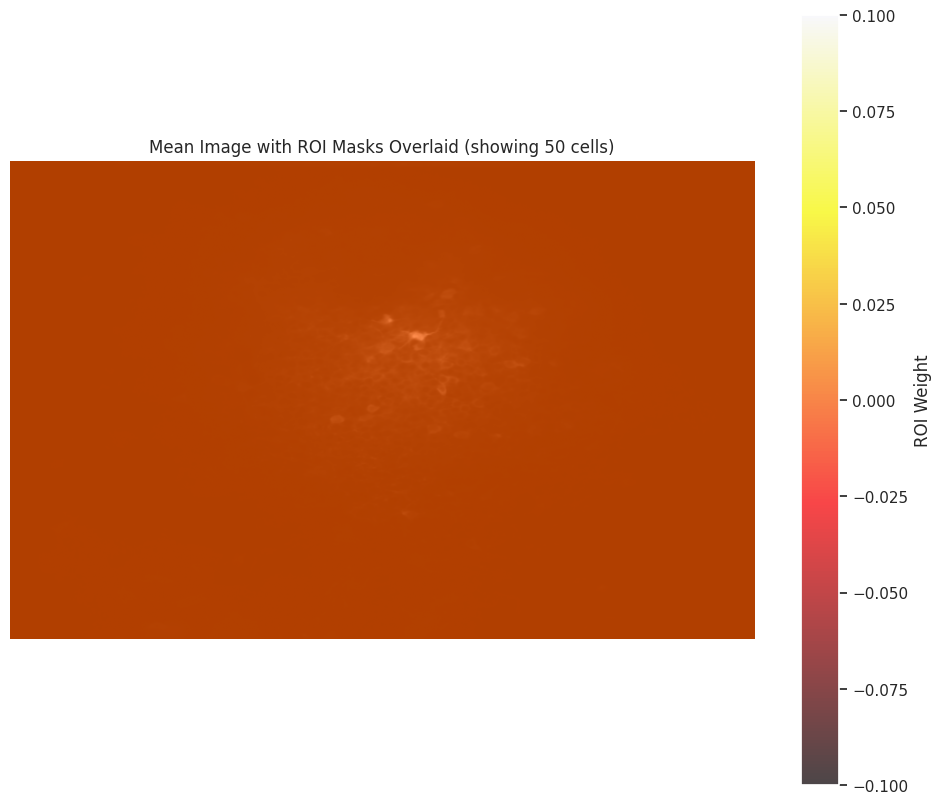

In [8]:
# Access the ROI information
plane_seg = nwb.processing["ophys"].data_interfaces["ImageSegmentation"].plane_segmentations["PlaneSegmentation"]

# Get image dimensions from the imaging plane
imaging_plane = plane_seg.imaging_plane
img_width, img_height = imaging_plane.grid_spacing[:]

# Check if there are background images we can use
try:
    backgrounds = nwb.processing["ophys"].data_interfaces["Backgrounds_0"]
    has_background = True
    mean_img = backgrounds.images["meanImg"].data[:]
except:
    has_background = False
    print("No background image found, creating an empty image")
    mean_img = np.zeros((512, 512))  # Default size, may need adjustment

# Get information about which ROIs are cells
iscell_data = plane_seg.iscell.data[:]
cell_indices = np.where(iscell_data[:, 0] > 0)[0]
print(f"Number of ROIs classified as cells: {len(cell_indices)} out of {len(iscell_data)}")

# Create a mask image combining all ROIs
# Note: The pixel_mask contains [x, y, weight] for each pixel in each ROI
mask_img = np.zeros_like(mean_img)

# Add all cell ROIs to the mask
for roi_idx in cell_indices[:50]:  # Limit to first 50 to avoid too much computation
    try:
        # Get pixel mask data for this ROI
        pixel_mask = plane_seg.pixel_mask[roi_idx]
        
        # Extract x, y coordinates and weights
        x_coords = pixel_mask[:, 0].astype(int)
        y_coords = pixel_mask[:, 1].astype(int)
        weights = pixel_mask[:, 2]
        
        # Add to the mask image
        mask_img[y_coords, x_coords] = np.maximum(mask_img[y_coords, x_coords], weights)
    except Exception as e:
        print(f"Error processing ROI {roi_idx}: {e}")

# Plot the mean image with ROI masks overlaid
plt.figure(figsize=(12, 10))

# Plot the mean image in grayscale
plt.imshow(mean_img, cmap='gray')

# Overlay the ROI masks
roi_cmap = plt.cm.hot
roi_cmap.set_bad(alpha=0)
plt.imshow(mask_img, cmap=roi_cmap, alpha=0.7)

plt.title(f'Mean Image with ROI Masks Overlaid (showing {len(cell_indices[:50])} cells)')
plt.axis('off')
plt.colorbar(label='ROI Weight')
plt.show()

## Examining Neural Responses to Behavioral Events

Now let's examine how neural activity relates to specific behavioral events like reward delivery.
We'll create event-triggered averages of neural activity around reward times.

In [9]:
# Define a function to get event-triggered activity
def get_event_triggered_activity(data, event_times, timestamps, pre_time=1.0, post_time=3.0):
    """
    Extract activity around specific events
    
    Parameters:
    -----------
    data : array
        Neural activity data (time x neurons)
    event_times : array
        Times of events
    timestamps : array
        Timestamps corresponding to the data
    pre_time : float
        Time before event (seconds)
    post_time : float
        Time after event (seconds)
        
    Returns:
    --------
    event_data : array
        Data aligned to events (events x time x neurons)
    time_relative : array
        Time relative to event
    """
    # Calculate sample offsets
    pre_samples = int(pre_time * sampling_rate)
    post_samples = int(post_time * sampling_rate)
    time_window = pre_samples + post_samples
    
    # Initialize output array
    event_data = np.zeros((len(event_times), time_window, data.shape[1]))
    
    # For each event
    valid_events = 0
    for i, event_time in enumerate(event_times):
        # Find the index of this event in the timestamps
        event_idx = np.argmin(np.abs(timestamps - event_time))
        
        # Check if we have enough data around this event
        if event_idx >= pre_samples and event_idx + post_samples <= len(timestamps):
            # Extract data around the event
            start_idx = event_idx - pre_samples
            end_idx = event_idx + post_samples
            event_data[valid_events] = data[start_idx:end_idx]
            valid_events += 1
    
    # Truncate the output array to only include valid events
    event_data = event_data[:valid_events]
    
    # Create a time array relative to the event
    time_relative = np.linspace(-pre_time, post_time, time_window)
    
    return event_data, time_relative

# Get event-triggered fluorescence around reward times
reward_fluor, reward_rel_time = get_event_triggered_activity(
    fluor_data, reward_times, fluor_timestamps, pre_time=2.0, post_time=5.0
)

# Get event-triggered deconvolved activity around reward times
reward_deconv, _ = get_event_triggered_activity(
    deconv_data, reward_times, fluor_timestamps, pre_time=2.0, post_time=5.0
)

print(f"Extracted data for {reward_fluor.shape[0]} reward events")
print(f"Each event has {reward_fluor.shape[1]} time points spanning {reward_rel_time[-1] - reward_rel_time[0]:.2f} seconds")

# Plot event-triggered averages for each neuron
plt.figure(figsize=(14, 12))

for i, roi_idx in enumerate(sampled_roi_indices):
    # Plot reward-triggered average fluorescence
    plt.subplot(num_sample_neurons, 2, 2*i+1)
    
    # Calculate mean and SEM
    mean_fluor = np.mean(reward_fluor[:, :, i], axis=0)
    sem_fluor = np.std(reward_fluor[:, :, i], axis=0) / np.sqrt(reward_fluor.shape[0])
    
    # Plot mean and shaded SEM
    plt.plot(reward_rel_time, mean_fluor, 'b-', lw=2)
    plt.fill_between(reward_rel_time, mean_fluor - sem_fluor, mean_fluor + sem_fluor, color='b', alpha=0.3)
    
    plt.axvline(0, color='r', linestyle='--', label='Reward')
    plt.xlabel('Time relative to reward (s)')
    plt.ylabel('Fluorescence (a.u.)')
    plt.title(f'Reward-triggered Fluorescence - ROI {roi_idx}')
    plt.legend()
    
    # Plot reward-triggered average deconvolved activity
    plt.subplot(num_sample_neurons, 2, 2*i+2)
    
    # Calculate mean and SEM
    mean_deconv = np.mean(reward_deconv[:, :, i], axis=0)
    sem_deconv = np.std(reward_deconv[:, :, i], axis=0) / np.sqrt(reward_deconv.shape[0])
    
    # Plot mean and shaded SEM
    plt.plot(reward_rel_time, mean_deconv, 'g-', lw=2)
    plt.fill_between(reward_rel_time, mean_deconv - sem_deconv, mean_deconv + sem_deconv, color='g', alpha=0.3)
    
    plt.axvline(0, color='r', linestyle='--', label='Reward')
    plt.xlabel('Time relative to reward (s)')
    plt.ylabel('Deconvolved Activity (a.u.)')
    plt.title(f'Reward-triggered Deconvolved Activity - ROI {roi_idx}')
    plt.legend()

plt.tight_layout()
plt.show()

NameError: name 'fluor_data' is not defined

## Examining Place Cell Properties

Now let's analyze the relationship between cell activity and spatial position to identify potential place cells.

In [10]:
# First, let's align neural data with position data
# We need to ensure we're using the same time points for both datasets

# Create aligned datasets
# Find common time period
start_time = max(fluor_timestamps[0], position_timestamps[0])
end_time = min(fluor_timestamps[-1], position_timestamps[-1])

# Get indices for this time period
fluor_indices = np.where((fluor_timestamps >= start_time) & (fluor_timestamps <= end_time))[0]
pos_indices = np.where((position_timestamps >= start_time) & (position_timestamps <= end_time))[0]

# Extract data for this period
aligned_fluor = fluor_data[fluor_indices]
aligned_deconv = deconv_data[fluor_indices]
aligned_pos = position_data[pos_indices]
aligned_speed = speed_data[pos_indices]

# Interpolate position and speed to match fluorescence timestamps
from scipy.interpolate import interp1d

f_position = interp1d(position_timestamps[pos_indices], aligned_pos)
f_speed = interp1d(position_timestamps[pos_indices], aligned_speed)

interp_pos = f_position(fluor_timestamps[fluor_indices])
interp_speed = f_speed(fluor_timestamps[fluor_indices])

print(f"Created aligned dataset with {len(fluor_indices)} time points")

# Create spatial tuning curves for each sample neuron
plt.figure(figsize=(14, 12))

# Define position bins
pos_bins = np.linspace(np.min(interp_pos), np.max(interp_pos), 30)
bin_centers = (pos_bins[:-1] + pos_bins[1:]) / 2

# Only include data points where the animal is moving
moving_threshold = 2.0  # cm/s
moving_indices = np.where(interp_speed >= moving_threshold)[0]

print(f"Using {len(moving_indices)} time points where animal is moving (speed >= {moving_threshold} cm/s)")

# Loop through sample neurons
for i, roi_idx in enumerate(sampled_roi_indices):
    plt.subplot(num_sample_neurons, 2, 2*i+1)
    
    # Create tuning curve using fluorescence
    tuning_curve = np.zeros(len(bin_centers))
    occupancy = np.zeros(len(bin_centers))
    
    for j in range(len(bin_centers)):
        bin_indices = np.where((interp_pos[moving_indices] >= pos_bins[j]) & 
                              (interp_pos[moving_indices] < pos_bins[j+1]))[0]
        if len(bin_indices) > 0:
            tuning_curve[j] = np.mean(aligned_fluor[moving_indices][bin_indices][:, i])
            occupancy[j] = len(bin_indices)
    
    # Normalize occupancy
    occupancy = occupancy / np.sum(occupancy)
    
    # Plot tuning curve
    plt.bar(bin_centers, tuning_curve, width=(pos_bins[1]-pos_bins[0]), alpha=0.7)
    plt.xlabel('Position (cm)')
    plt.ylabel('Mean Fluorescence (a.u.)')
    plt.title(f'Spatial Tuning Curve - ROI {roi_idx}')
    
    # Plot also using deconvolved activity
    plt.subplot(num_sample_neurons, 2, 2*i+2)
    
    # Create tuning curve using deconvolved activity
    tuning_curve_deconv = np.zeros(len(bin_centers))
    
    for j in range(len(bin_centers)):
        bin_indices = np.where((interp_pos[moving_indices] >= pos_bins[j]) & 
                              (interp_pos[moving_indices] < pos_bins[j+1]))[0]
        if len(bin_indices) > 0:
            tuning_curve_deconv[j] = np.mean(aligned_deconv[moving_indices][bin_indices][:, i])
    
    # Plot deconvolved tuning curve
    plt.bar(bin_centers, tuning_curve_deconv, width=(pos_bins[1]-pos_bins[0]), alpha=0.7, color='g')
    plt.xlabel('Position (cm)')
    plt.ylabel('Mean Deconvolved Activity (a.u.)')
    plt.title(f'Spatial Tuning Curve (Deconvolved) - ROI {roi_idx}')

plt.tight_layout()
plt.show()

NameError: name 'fluor_timestamps' is not defined

## Advanced Analysis: Creating a Population Representation of Space

Let's create a representation of how the neural population as a whole encodes spatial information.
We'll create a matrix of neural activity versus position to visualize how different neurons respond to different locations.

In [11]:
# Let's analyze a larger sample of neurons for this population analysis
num_pop_neurons = 30
pop_roi_indices = np.random.choice(cell_indices, size=min(num_pop_neurons, len(cell_indices)), replace=False)
print(f"Analyzing population activity for {len(pop_roi_indices)} neurons")

# Get data for these neurons
pop_fluor = fluor_series.data[fluor_indices][:, pop_roi_indices]

# Create position bins
pos_bins = np.linspace(np.min(interp_pos), np.max(interp_pos), 40)
bin_centers = (pos_bins[:-1] + pos_bins[1:]) / 2

# Create a matrix of position versus neural activity
position_activity_matrix = np.zeros((len(bin_centers), len(pop_roi_indices)))

# Fill the matrix
for i in range(len(bin_centers)):
    bin_indices = np.where((interp_pos >= pos_bins[i]) & (interp_pos < pos_bins[i+1]) & 
                          (interp_speed >= moving_threshold))[0]
    if len(bin_indices) > 0:
        position_activity_matrix[i] = np.mean(pop_fluor[bin_indices], axis=0)

# Normalize each neuron's activity to its maximum for better visualization
normalized_matrix = position_activity_matrix / np.max(position_activity_matrix, axis=0, keepdims=True)

# Sort neurons by position of peak activity
peak_positions = np.argmax(normalized_matrix, axis=0)
sorted_indices = np.argsort(peak_positions)

sorted_matrix = normalized_matrix[:, sorted_indices]

# Plot the position versus neural activity matrix
plt.figure(figsize=(12, 10))
plt.imshow(sorted_matrix.T, aspect='auto', cmap='viridis', 
            extent=[np.min(interp_pos), np.max(interp_pos), 0, len(pop_roi_indices)])
plt.colorbar(label='Normalized Activity')
plt.xlabel('Position (cm)')
plt.ylabel('Neuron (sorted by preferred position)')
plt.title('Population Representation of Space')
plt.tight_layout()
plt.show()

Analyzing population activity for 30 neurons


NameError: name 'fluor_indices' is not defined

## Summary and Next Steps

In this notebook, we explored Dandiset 001361, which contains 2-photon imaging and behavioral data from mice navigating in a virtual reality environment. We focused on a dataset from subject m11, session 03.

### Key findings:

1. **Behavioral Data**: We visualized the animal's position and speed as it navigated through the virtual environment, as well as the timing of reward events.

2. **Neural Activity**: We examined fluorescence signals and deconvolved activity from neurons in hippocampal area CA1, which showed diverse patterns of activity.

3. **Event-Related Activity**: We analyzed how neural activity changed in response to reward delivery, finding some neurons that appeared to respond to rewards.

4. **Spatial Tuning**: We identified potential place cells by examining how neural activity varied with the animal's position in the virtual environment.

5. **Population Coding**: We created a population-level representation of how the ensemble of neurons encoded spatial information.

### Possible next steps for further analysis:

1. **Extended Dataset Analysis**: Analyze multiple sessions to track changes in neural representations over time, especially across learning.

2. **Trial-by-Trial Analysis**: Examine how neural activity changes with learning across trials.

3. **Reward Relocation**: As the paper focuses on how place cells remap when reward locations change, it would be valuable to compare sessions before and after reward location changes.

4. **Advanced Decoding**: Implement neural decoders to predict the animal's position or behavioral state from neural activity.

5. **Network Analysis**: Examine correlations between neurons to understand functional connectivity.

The Dandiset provides a rich resource for studying how hippocampal neurons represent and adapt to changing spatial environments, particularly in relation to reward locations. This analysis offers just a starting point for exploring the neural basis of spatial navigation and learning.